In [105]:
import numpy as np
import pandas as pd
import sys


import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Generating initial Agent attributes

In [11]:
# initial_data = pd.read_csv('../results/sharing_details_0/initial_data.csv')
# # initial_data_2 = pd.read_csv('../results/sharing_details_1/initial_data.csv')

In [97]:
# initial_data.columns

In [33]:
import networkx as nx

def get_agent_pol_inclinations(df, n_issues):

    dem_fav_topics = ['issue_' + str(x) for x in range(n_issues) if x%2 == 0]
    rep_fav_topics = ['issue_' + str(x) for x in range(n_issues) if x%2 == 1]
    mean_rep_support = df[rep_fav_topics].mean(axis = 1)
    mean_dem_support = df[dem_fav_topics].mean(axis = 1) 

    pol_inclination = mean_dem_support - mean_rep_support

    pol_inclination = pol_inclination.clip(-1, 1)

    if(any(pol_inclination) < -1 or any(pol_inclination) > 1):
        print("Pol inclination exceed 1 or is lowers than -1 \n", df)
        sys.exit()

    return pol_inclination

def creat_social_network(edges):

        G = nx.Graph()
        lines = edges.split("\n")
        for e in lines:
            nodes = e.split()
            if(len(nodes) > 1):
                if(nodes[0] not in G):
                    G.add_node(nodes[0])
                if(nodes[1] not in G):
                    G.add_node(nodes[1])

                G.add_edge(nodes[0], nodes[1])

        return G

def get_social_network(n_issues):

        G = nx.karate_club_graph()
        fb_network = open('../../data/facebook_combined.txt', 'r').read()
        G = creat_social_network(fb_network)
        A = nx.adjacency_matrix(G).todense()
        A = np.array(A)
        n = A.shape[0]
        G = nx.from_numpy_matrix(A)

        df = pd.DataFrame()
        df['id'] = range(n)
    #     df['gender'] = list(np.random.choice(a=[0, 1], size=n, p=[0.5, 0.5]))
    #     df['age'] = list(np.random.choice(a=[0, 1, 2], size=n, p=[0.6, 0.3, 0.1]))
    #     df['education'] = list(np.random.choice(a=[0, 1, 2], size=n, p=[0.6, 0.3, 0.1]))
    #     df['income'] = list(np.random.choice(a=[0, 1, 2], size=n, p=[0.6, 0.3, 0.1]))

        min_max_norm = lambda x: np.round((x-x.min())/(x.max() - x.min()), 6)
        mean_norm = lambda x: np.round((x-x.mean())/(x.max() - x.min()), 6)

        df['user_activity'] = min_max_norm(np.array([round(x,6) if x<1 else 1 for x in np.random.normal(loc=0.9, scale=0.5, size=n)]))
        df['pol_interest'] = min_max_norm(np.random.normal(loc=0.5, scale=0.5, size=n))
        df['privacy_preference'] = min_max_norm(np.random.normal(loc=0.5, scale=0.5, size=n))
        df['user_satisfaction'] = [0] * n

#         dist = mean_norm(np.random.normal(loc=0.0, scale=1.0, size=n))
#         dist = 2.*(dist - np.min(dist))/np.ptp(dist)-1
#         df['pol_inclination'] = list(dist)
#         #df['pol_inclination'] = list(np.random.choice(a=[-1, -0.1, 0, 0.1, 1], size=n, p=[0.05, 0.20, 0.50, 0.20, 0.05]))
        
        for i in range(n_issues):
            
            dist = mean_norm(np.random.normal(loc=0.0, scale=1.0, size=df.shape[0]))
            dist = 2.*(dist - np.min(dist))/np.ptp(dist)-1
            
            df['issue_'+str(i)] = dist
            
        df['pol_inclination'] = get_agent_pol_inclinations(df, n_issues)
            
#         node_attr = df.set_index('id').to_dict('index')
#         nx.set_node_attributes(G, node_attr)

        return df

In [78]:
initial_data = get_social_network(6)

In [79]:
initial_data.to_csv('data/initial_data_5.csv')

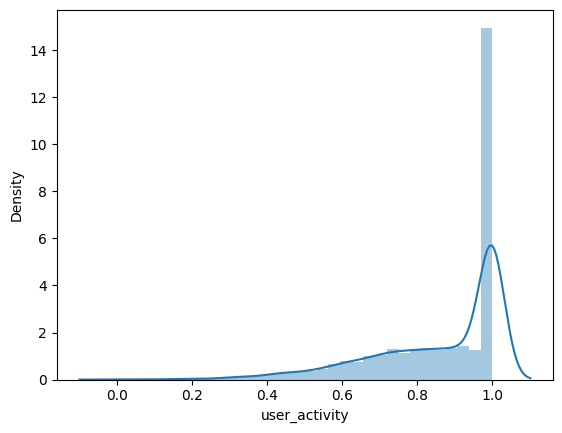

In [82]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(initial_data.user_activity,ax=ax)
plt.show()

In [80]:
initial_data = pd.read_csv('data/initial_data_5.csv')

In [81]:
initial_data.pol_inclination.mean()

0.027419995543451387

In [104]:
# min_max_norm = lambda x: np.round((x-x.min())/(x.max() - x.min()), 6)
# k =  min_max_norm(np.random.normal(loc=0.5, scale=0.5, size=n))

def plot(pd_series):
    
    fig = plt.figure()
    ax = fig.add_subplot()
    sns.distplot(pd_series,ax=ax)
    plt.show()

### Generate Posts

In [154]:
def normalize(values, bounds_dlower, bounds_alower, bounds_dupper, bounds_aupper):
    return [bounds_dlower + (x - bounds_alower) * (bounds_dupper - bounds_dlower) / (bounds_aupper - bounds_alower) for x in values]

def generate_posts(n_posts, n_issues):
        
    n = int(n_posts/(n_issues*2)) 
    df = pd.DataFrame()
    for i in range(n_issues):

        dist = np.random.normal(loc=0.5, scale=0.25, size=n)
        dist1 = normalize(dist, 0, min(dist), 1, max(dist))
        dist2 = normalize(dist, 0, min(dist), -1, max(dist))
        post_conf = pd.DataFrame(dist1 + dist2, columns = ['stance'])
        post_conf['issue'] = i
        df = pd.concat((df, post_conf), axis = 0)

    df = shuffle(df)
    return df

In [155]:
posts = generate_posts(2000, 6)

In [156]:
posts.issue.value_counts()

0    332
4    332
3    332
5    332
2    332
1    332
Name: issue, dtype: int64

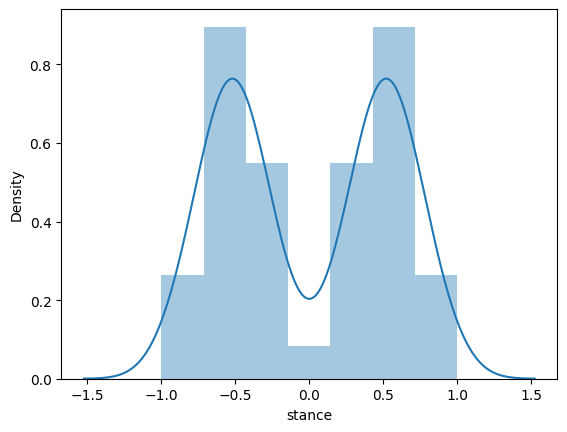

In [157]:
plot(posts[posts['issue'] == 4]['stance'])

In [158]:
posts.to_csv('data/posts_1.csv')

In [159]:
import random
random.random()

0.19010609077355967